In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [25]:
data = {
    "Name": ["John", "John", "Camela", "Alex", "Diego", "Cristiano", "Mihail", "Kathy", "Nicole", "Ray", "Fredric", "Yul", "Joan", "Jane", "Anna", "Katharine", "Katharine", "Barbra", "Maggie", "Glenda", "Jane", "Maximilian", "Gregory", "Sidney", "Rex", "Lee", "Paul", "Rod", "John", "Gene", "Marlon", "Jack", "Jack", "Peter", "Richard", "Dustin", "Henry", "Robert", "Ellen", "Faye", "Diane", "Jane", "Sally", "Sissy", "Jessica", "Gwyneth", "Halle", "Nicole", "Charlize", "Katharine", "Katharine", "Barbra", "Maggie", "Glenda", "Ernest", "Alec", "Charlton", "Gregory", "Sidney"],
    "Surname": ["Wick", "Constantine", "Anderson", "Telles", "Maradona", "Ronaldo", "Tal", "Bates", "Kidman", "Milland", "March", "Brynner", "Crawford", "Wyman", "Magnani", "Hepburn", "Hepburn", "Streisand", "Smith", "Jackson", "Fonda", "Schell", "Peck", "Poitier", "Harrison", "Marvin", "Scofield", "Steiger", "Wayne", "Hackman", "Brando", "Lemmon", "Nicholson", "Finch", "Dreyfuss", "Hoffman", "Henry", "Duvall", "Burstyn", "Dunaway", "Keaton", "Fonda", "Field", "Spacek", "Lange", "Paltrow", "Berry", "Kidman", "Theron", "Hepburn", "Hepburn", "Streisand", "Smith", "Jackson", "Borgnine", "Guinness", "Heston", "Peck", "Poitier"],
    "Age": [35, 27, 30, 28, 68, 34, 58, 22, 45, 52, 33, 18, 25, 28, 34, 39, 42, 19, 62, 73, 55, 33, 22, 44, 77, 21, 37, 34, 55, 40, 36, 56, 47, 62, 26, 25, 59, 62, 33, 37, 50, 47, 69, 63, 39, 21, 31, 28, 53, 62, 42, 44, 26, 35, 77, 75, 43, 51],
    "Smokes": [3, 20, 0, 0, 4, 0, 15, 12, 2, 18, 4, 10, 2, 20, 25, 18, 22, 12, 5, 10, 15, 8, 20, 5, 3, 20, 15, 12, 20, 20, 13, 20, 15, 1, 20, 10, 20, 20, 12, 8, 20, 12, 20, 20, 15, 20, 20, 20, 20, 12, 30, 34, 20, 35, 20, 13, 20, 15, 25, 9, 10],
    "AreaQ": [5, 2, 5, 8, 5, 10, 10, 5, 6, 4, 8, 6, 5, 2, 4, 8, 3, 8, 4, 7, 1, 8, 6, 8, 1, 5, 6, 8, 1, 2, 5, 3, 1, 8, 3, 8, 3, 5, 1, 8, 4, 5, 4, 5, 2, 8, 8, 4, 9, 4, 6, 3, 5, 6, 2, 8, 5, 6, 1, 8, 3, 9, 0],
    "Alkhol": [4, 5, 2, 1, 6, 0, 0, 2, 0, 5, 0, 3, 1, 8, 8, 1, 5, 0, 3, 6, 1, 1, 1, 0, 6, 3, 2, 0, 4, 1, 2, 0, 1, 4, 2, 2, 4, 1, 4, 5, 1, 3, 0, 0, 2, 3, 1, 4, 0, 4, 3, 8, 4, 3, 0, 6, 1, 4, 1, 8, 2, 4, 5],
    "Result": [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
}

print("Lung Cancer Dataset:")
print(lung_cancer_data)

Lung Cancer Dataset:
          Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0         John         Wick   35       3      5       4       1
1         John  Constantine   27      20      2       5       1
2       Camela     Anderson   30       0      5       2       0
3         Alex       Telles   28       0      8       1       0
4        Diego     Maradona   68       4      5       6       1
5    Cristiano      Ronaldo   34       0     10       0       0
6       Mihail          Tal   58      15     10       0       0
7        Kathy        Bates   22      12      5       2       0
8       Nicole       Kidman   45       2      6       0       0
9          Ray      Milland   52      18      4       5       1
10     Fredric        March   33       4      8       0       0
11         Yul      Brynner   18      10      6       3       0
12        Joan     Crawford   25       2      5       1       0
13        Jane        Wyman   28      20      2       8       1
14        Anna     

In [26]:
X = lung_cancer_data[['Age', 'Smokes', 'AreaQ', 'Alkhol']]
y = lung_cancer_data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

svm_clf = SVC(probability=True)
svm_clf.fit(X_train_resampled, y_train_resampled)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_resampled, y_train_resampled)

svm_predictions = svm_clf.predict_proba(X_test)[:, 1]
knn_predictions = knn_clf.predict_proba(X_test)[:, 1]

In [27]:
svm_accuracy = accuracy_score(y_test, svm_clf.predict(X_test))
svm_precision = precision_score(y_test, svm_clf.predict(X_test))
svm_recall = recall_score(y_test, svm_clf.predict(X_test))
svm_f1 = f1_score(y_test, svm_clf.predict(X_test))
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

knn_accuracy = accuracy_score(y_test, knn_clf.predict(X_test))
knn_precision = precision_score(y_test, knn_clf.predict(X_test))
knn_recall = recall_score(y_test, knn_clf.predict(X_test))
knn_f1 = f1_score(y_test, knn_clf.predict(X_test))
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

In [28]:
print("\nEvaluation Metrics:")
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-Score:", svm_f1)
print("SVM AUC-ROC:", svm_roc_auc)


Evaluation Metrics:
SVM Accuracy: 0.8333333333333334
SVM Precision: 1.0
SVM Recall: 0.5
SVM F1-Score: 0.6666666666666666
SVM AUC-ROC: 0.90625


In [29]:
print("\nKNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1-Score:", knn_f1)
print("KNN AUC-ROC:", knn_roc_auc)


KNN Accuracy: 0.8333333333333334
KNN Precision: 1.0
KNN Recall: 0.5
KNN F1-Score: 0.6666666666666666
KNN AUC-ROC: 0.84375


In [30]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1, svm_roc_auc],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc]
})

print("\nEvaluation Metrics Table:")
print(metrics_df)


Evaluation Metrics Table:
      Metric       SVM       KNN
0   Accuracy  0.833333  0.833333
1  Precision  1.000000  1.000000
2     Recall  0.500000  0.500000
3   F1-Score  0.666667  0.666667
4    AUC-ROC  0.906250  0.843750


Text(0, 0.5, 'Precision')

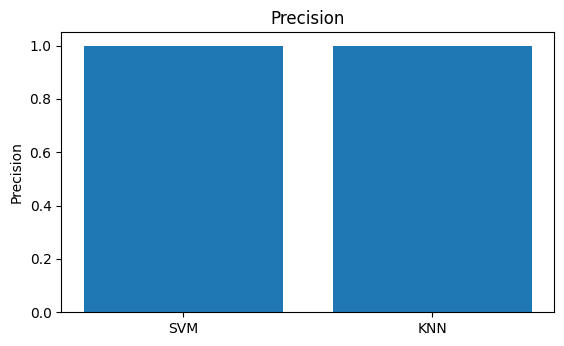

In [31]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.bar(['SVM', 'KNN'], [svm_precision, knn_precision])
plt.title('Precision')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

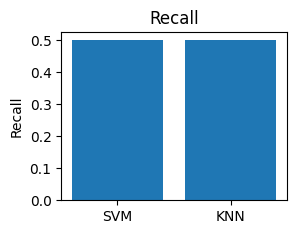

In [32]:
plt.subplot(2, 2, 2)
plt.bar(['SVM', 'KNN'], [svm_recall, knn_recall])
plt.title('Recall')
plt.ylabel('Recall')

Text(0, 0.5, 'F1-score')

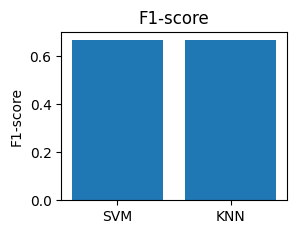

In [33]:
plt.subplot(2, 2, 3)
plt.bar(['SVM', 'KNN'], [svm_f1, knn_f1])
plt.title('F1-score')
plt.ylabel('F1-score')

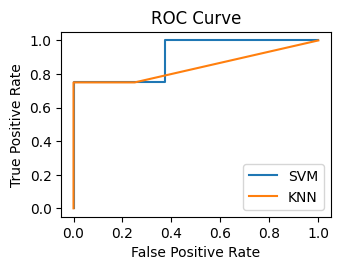

In [34]:
plt.subplot(2, 2, 4)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Class Distribution Before SMOTE')

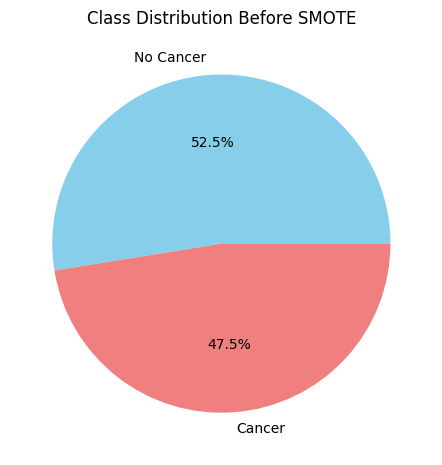

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(lung_cancer_data['Result'].value_counts(), labels=['No Cancer', 'Cancer'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution Before SMOTE')

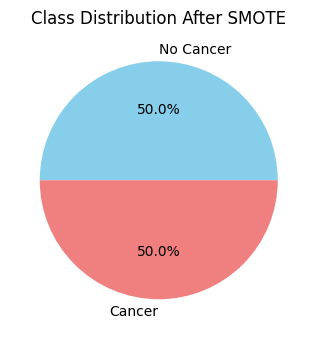

In [36]:
plt.subplot(1, 2, 2)
plt.pie(pd.Series(y_train_resampled).value_counts(), labels=['No Cancer', 'Cancer'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution After SMOTE')
plt.tight_layout()
plt.show()